<a href="https://colab.research.google.com/github/Ragul-RD-003/Credit-Card-Fraud-Detection/blob/main/Guarding%20Transactions%20with%20an%20AI-Powered%20Credit%20Card%20Fraud%20Detection%20and%20Prevention%20System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Available files: ['.config', 'creditcard.csv', 'sample_data']
Dataset shape: (284807, 31)


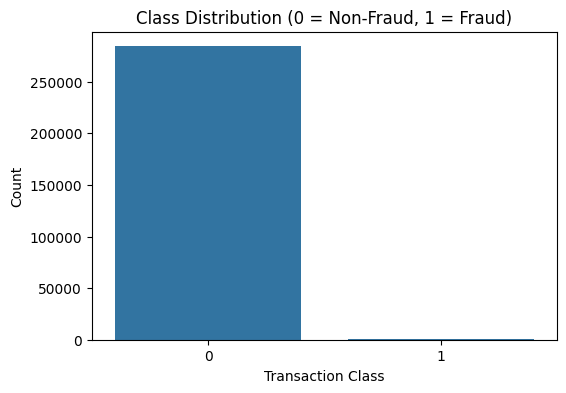

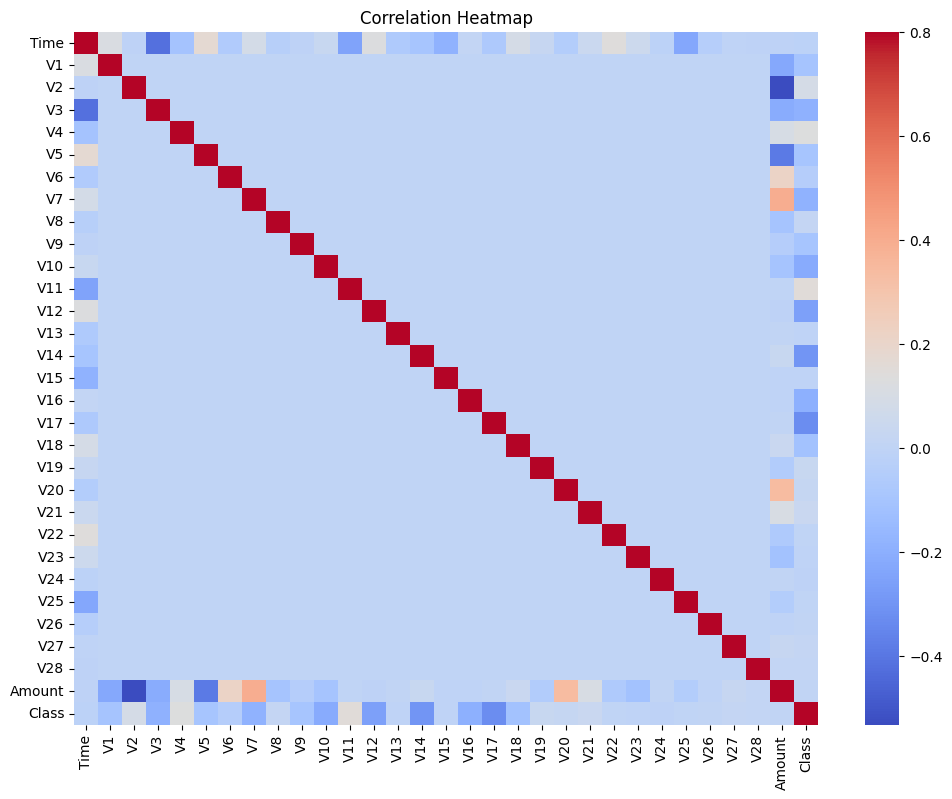

Confusion Matrix:
 [[56859     5]
 [   17    81]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9528106983508091


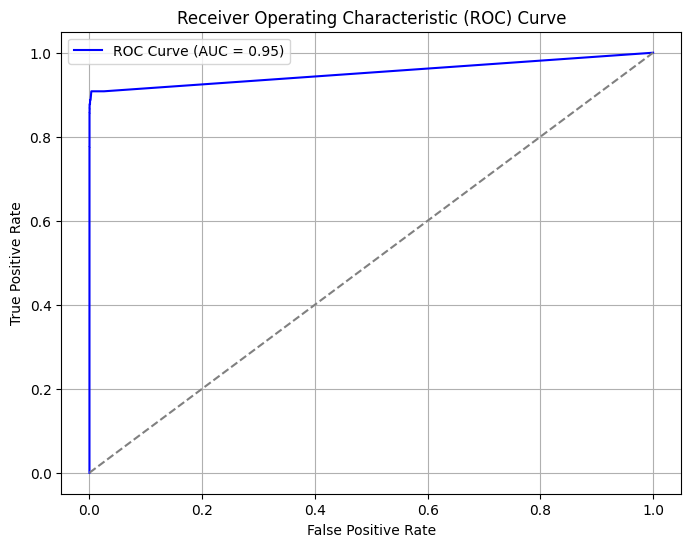

In [2]:


# Developed for Phase 2: AI-Powered Credit Card Fraud Detection System

# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Step 2: Load the Dataset
import os
print("Available files:", os.listdir())  # To confirm the dataset is available
df = pd.read_csv('creditcard.csv')
print("Dataset shape:", df.shape)
df.head()

# Step 3: Exploratory Data Analysis (EDA)

# 3.1 Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.xlabel('Transaction Class')
plt.ylabel('Count')
plt.show()

# 3.2 Correlation Heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), cmap='coolwarm', vmax=0.8)
plt.title('Correlation Heatmap')
plt.show()

# Step 4: Data Preprocessing

# 4.1 Normalize the 'Amount' column
df['NormalizedAmount'] = StandardScaler().fit_transform(df[['Amount']])

# 4.2 Drop unnecessary columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Step 5: Split Dataset into Train and Test Sets
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Train the Machine Learning Model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Model Evaluation

# 7.1 Confusion Matrix
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 7.2 Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7.3 ROC-AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

# 7.4 ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()